In [106]:
import numpy as numpy
import pandas as pd 


In [107]:
import os
os.path.abspath(os.getcwd())

'e:\\Alireza\\Uppsala\\Classes\\Data_Mining\\Project'

In [108]:
df = pd.read_csv("Dataset/average_fruit_vegtable_ppd.csv")
df.head()

,COUNTRY,COUNTRY_GRP,SEX,YEAR,VALUE
0,ALB,NaN,ALL,1961.0,128.80
1,ALB,NaN,ALL,1962.0,121.44
2,ALB,NaN,ALL,1963.0,115.27
3,ALB,NaN,ALL,1964.0,127.38
4,ALB,NaN,ALL,1965.0,120.52


In [109]:
df.drop(columns=["COUNTRY_GRP"],inplace=True)

In [110]:
for col in df:
    print(df[col].unique())

['ALB' 'ARM' 'AUT' 'AZE' 'BEL' 'BGR' 'BIH' 'BLR' nan 'CHE' 'CYP' 'CZE'
 'DEU' 'DNK' 'ESP' 'EST' 'FIN' 'FRA' 'GBR' 'GEO' 'GRC' 'HRV' 'HUN' 'IRL'
 'ISL' 'ISR' 'ITA' 'KAZ' 'KGZ' 'LTU' 'LUX' 'LVA' 'MDA' 'MKD' 'MLT' 'MNE'
 'NLD' 'NOR' 'POL' 'PRT' 'ROU' 'RUS' 'SRB' 'SVK' 'SVN' 'SWE' 'TJK' 'TKM'
 'TUR' 'UKR' 'UZB' 'Last update' 'Description' 'Reference link'
 'Copyright' '© WHO Regional Office for Europe 2025. All rights reserved.']
['ALL' nan]
[1961. 1962. 1963. 1964. 1965. 1966. 1967. 1968. 1969. 1970. 1971. 1972.
 1973. 1974. 1975. 1976. 1977. 1978. 1979. 1980. 1981. 1982. 1983. 1984.
 1985. 1986. 1987. 1988. 1989. 1990. 1991. 1992. 1993. 1994. 1995. 1996.
 1997. 1998. 1999. 2000. 2001. 2002. 2003. 2004. 2005. 2006. 2007. 2008.
 2009. 2010. 2011. 2012. 2013. 2014. 2015. 2016. 2017. 2018. 2019.   nan]
[128.8  121.44 115.27 ... 218.4  218.3     nan]


In [111]:
import pycountry
import numpy as np # Used to represent nan for the example

# Your initial list of country codes and other items
codes = [
    'ALB', 'AND', 'ARM', 'AUT', 'AZE', 'BEL', 'BGR', 'BIH', 'BLR', np.nan,
    'CHE', 'CYP', 'CZE', 'DEU', 'DNK', 'ESP', 'EST', 'FIN', 'FRA', 'GBR',
    'GEO', 'GRC', 'HRV', 'HUN', 'IRL', 'ISL', 'ISR', 'ITA', 'KAZ', 'KGZ',
    'LTU', 'LUX', 'LVA', 'MDA', 'MKD', 'MLT', 'MNE', 'NLD', 'NOR', 'POL',
    'PRT', 'ROU', 'RUS', 'SMR', 'SRB', 'SVK', 'SVN', 'SWE', 'TJK', 'TKM',
    'TUR', 'UKR', 'UZB', 'Last update', 'Description'
]

# Create a dictionary to map the 3-letter code to the full country name
country_name_map = {}

for code in codes:
    # Ensure the code is a string and handle potential nan values
    if isinstance(code, str):
        try:
            # Look up the country by its 3-letter code
            country = pycountry.countries.get(alpha_3=code)
            if country:
                country_name_map[code] = country.name
        except AttributeError:
         
            pass

if 'GBR' in country_name_map:
    country_name_map['GBR'] = 'United Kingdom'

# Now you can use this map to convert your original data
# For example, if you have a pandas Series:
df['COUNTRY'] = df['COUNTRY'].map(country_name_map)



# --- Example Usage ---
print("--- Country Code to Full Name Map ---")
print(country_name_map)

# To get a list of just the full names:
full_names = [country_name_map.get(code) for code in codes if country_name_map.get(code)]
print("\n--- List of Full Country Names ---")
print(full_names)

--- Country Code to Full Name Map ---
{'ALB': 'Albania', 'AND': 'Andorra', 'ARM': 'Armenia', 'AUT': 'Austria', 'AZE': 'Azerbaijan', 'BEL': 'Belgium', 'BGR': 'Bulgaria', 'BIH': 'Bosnia and Herzegovina', 'BLR': 'Belarus', 'CHE': 'Switzerland', 'CYP': 'Cyprus', 'CZE': 'Czechia', 'DEU': 'Germany', 'DNK': 'Denmark', 'ESP': 'Spain', 'EST': 'Estonia', 'FIN': 'Finland', 'FRA': 'France', 'GBR': 'United Kingdom', 'GEO': 'Georgia', 'GRC': 'Greece', 'HRV': 'Croatia', 'HUN': 'Hungary', 'IRL': 'Ireland', 'ISL': 'Iceland', 'ISR': 'Israel', 'ITA': 'Italy', 'KAZ': 'Kazakhstan', 'KGZ': 'Kyrgyzstan', 'LTU': 'Lithuania', 'LUX': 'Luxembourg', 'LVA': 'Latvia', 'MDA': 'Moldova, Republic of', 'MKD': 'North Macedonia', 'MLT': 'Malta', 'MNE': 'Montenegro', 'NLD': 'Netherlands', 'NOR': 'Norway', 'POL': 'Poland', 'PRT': 'Portugal', 'ROU': 'Romania', 'RUS': 'Russian Federation', 'SMR': 'San Marino', 'SRB': 'Serbia', 'SVK': 'Slovakia', 'SVN': 'Slovenia', 'SWE': 'Sweden', 'TJK': 'Tajikistan', 'TKM': 'Turkmenistan', 

In [112]:
filtered_df = df[df['YEAR'].between(2000, 2022)]

print(filtered_df)

      COUNTRY  SEX    YEAR   VALUE
39    Albania  ALL  2000.0  227.30
40    Albania  ALL  2001.0  246.32
41    Albania  ALL  2002.0  259.42
42    Albania  ALL  2003.0  277.22
43    Albania  ALL  2004.0  278.88
...       ...  ...     ...     ...
2512      NaN  ALL  2015.0  213.74
2513      NaN  ALL  2016.0  219.00
2514      NaN  ALL  2017.0  218.40
2515      NaN  ALL  2018.0  218.30
2516      NaN  ALL  2019.0  216.69

[1208 rows x 4 columns]


In [113]:
# Your original list of countries
all_countries = [
    'Albania', 'Andorra', 'Armenia', 'Austria', 'Azerbaijan', 'Belgium', 'Bulgaria',
    'Bosnia and Herzegovina', 'Belarus', 'Switzerland', 'Cyprus', 'Czechia',
    'Germany', 'Denmark', 'Spain', 'Estonia', 'Finland', 'France', 'United Kingdom',
    'Georgia', 'Greece', 'Croatia', 'Hungary', 'Ireland', 'Iceland', 'Israel',
    'Italy', 'Kazakhstan', 'Kyrgyzstan', 'Lithuania', 'Luxembourg', 'Latvia',
    'Moldova, Republic of', 'North Macedonia', 'Malta', 'Montenegro', 'Netherlands',
    'Norway', 'Poland', 'Portugal', 'Romania', 'Russian Federation', 'San Marino',
    'Serbia', 'Slovakia', 'Slovenia', 'Sweden', 'Tajikistan', 'Turkmenistan',
    'Türkiye', 'Ukraine', 'Uzbekistan'
]

# A set of current EU member states for fast checking
eu_countries = {
    'Austria', 'Belgium', 'Bulgaria', 'Croatia', 'Cyprus', 'Czechia', 'Denmark',
    'Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Ireland',
    'Italy', 'Latvia', 'Lithuania', 'Luxembourg', 'Malta', 'Netherlands', 'Poland',
    'Portugal', 'Romania', 'Slovakia', 'Slovenia', 'Spain', 'Sweden'
}

# Use a list comprehension to keep only the countries that are in the eu_countries set
only_eu_countries = [country for country in all_countries if country in eu_countries]

print(only_eu_countries)

['Austria', 'Belgium', 'Bulgaria', 'Cyprus', 'Czechia', 'Germany', 'Denmark', 'Spain', 'Estonia', 'Finland', 'France', 'Greece', 'Croatia', 'Hungary', 'Ireland', 'Italy', 'Lithuania', 'Luxembourg', 'Latvia', 'Malta', 'Netherlands', 'Poland', 'Portugal', 'Romania', 'Slovakia', 'Slovenia', 'Sweden']


In [114]:

# This creates a boolean Series: True for rows where the country is in the EU, False otherwise.
is_eu_country = filtered_df['COUNTRY'].isin(eu_countries)

# Use this boolean Series to select only the rows that are True.
filtered_df = filtered_df[is_eu_country]


In [115]:
filtered_df

,COUNTRY,SEX,YEAR,VALUE
126,Austria,ALL,2000.0,209.26
127,Austria,ALL,2001.0,224.27
128,Austria,ALL,2002.0,211.71
129,Austria,ALL,2003.0,231.58
130,Austria,ALL,2004.0,243.20
...,...,...,...,...
2285,Sweden,ALL,2015.0,155.73
2286,Sweden,ALL,2016.0,156.66
2287,Sweden,ALL,2017.0,149.67
2288,Sweden,ALL,2018.0,142.69


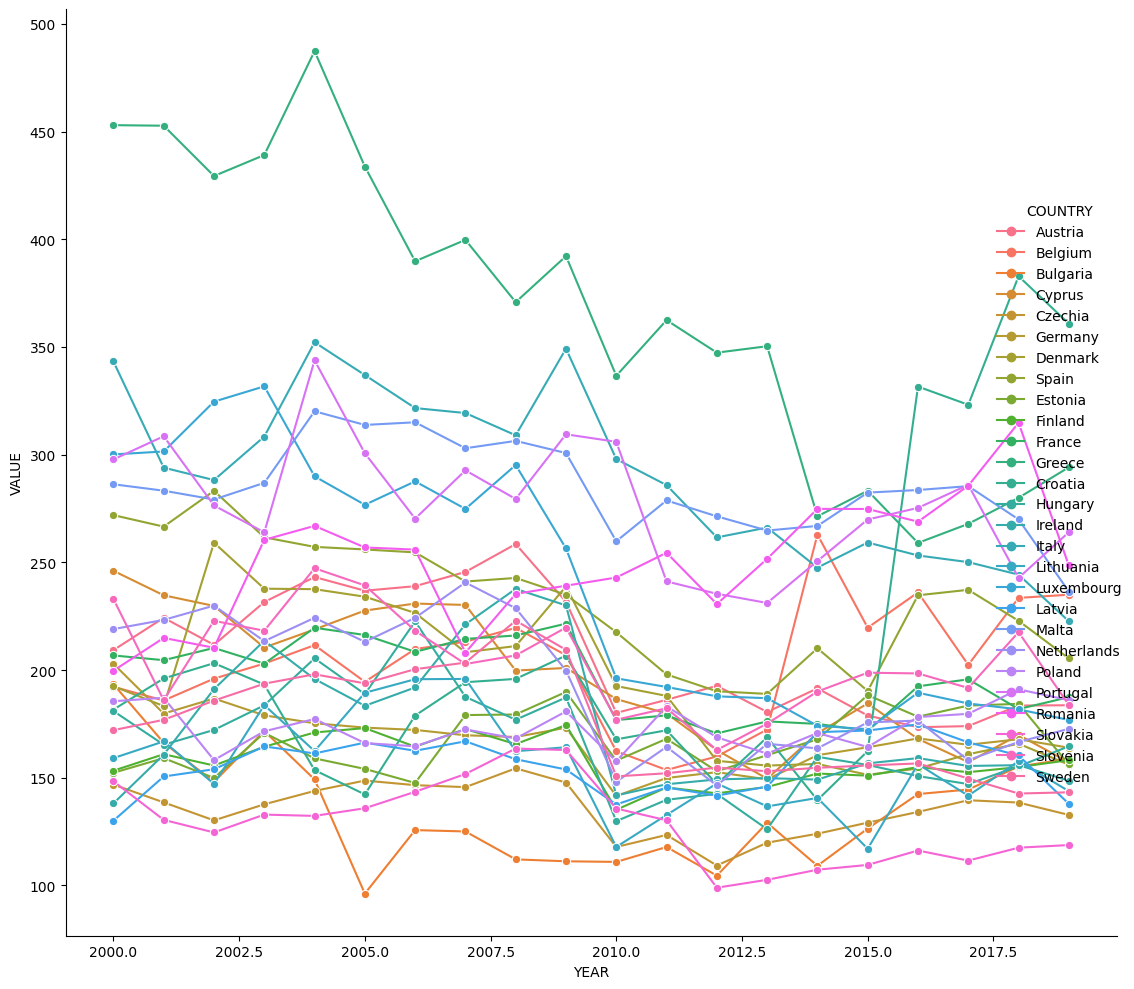

In [116]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.relplot(
    data=filtered_df,
    x='YEAR',
    y='VALUE',
    hue='COUNTRY',  # This tells Seaborn to draw a separate line for each country
    kind='line',
    marker='o',
    height=10,       # Adjust figure size
    aspect=1.0
)

# Improve layout and display the plot
plt.tight_layout()
plt.show()

In [117]:
# Find the row with the highest life expectancy in the entire dataset
max_le_row = filtered_df.loc[filtered_df['VALUE'].idxmax()]

# Find the row with the lowest life expectancy in the entire dataset
min_le_row = filtered_df.loc[filtered_df['VALUE'].idxmin()]

print("--- Highest Life Expectancy ---")
print(max_le_row)

print("\n--- Lowest Life Expectancy ---")
print(min_le_row)

--- Highest Life Expectancy ---
COUNTRY    Greece
SEX           ALL
YEAR       2004.0
VALUE      487.33
Name: 1141, dtype: object

--- Lowest Life Expectancy ---
COUNTRY    Bulgaria
SEX             ALL
YEAR         2005.0
VALUE         96.24
Name: 238, dtype: object


In [118]:
df_csv=pd.read_csv('European_citiznes_rsvp.csv')
df_csv['average_fruit_vegtable_ppd'] = df['VALUE']

df_csv.to_csv("European_citiznes_rsvp.csv", index=False)
